In [ ]:
%env OPENAI_API_KEY=<PUT_YOUR_API_KEY_HERE>

In [6]:
import numpy as np
from openai import OpenAI
import os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

EMBEDDING_MODEL = "text-embedding-ada-002"


def get_embedding(text, model):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding


def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))


# Get Positive Review And Negative Review's Embedding
positive_review = get_embedding("Positive Review", EMBEDDING_MODEL)
negative_review = get_embedding("Negative Review", EMBEDDING_MODEL)

positive_example = get_embedding(
    "Overall, packaging was very nice. Purchased this as a gift for a kid's birthday party. Loved the detachable book on the front of the box. The kid should be extremely pleased with the item.", EMBEDDING_MODEL)
negative_example = get_embedding(
    "I purchased this product for a birthday gift. The Lego box was shipped in a bag and the box was all dented and damaged. No time to make a return as it was a gift.", EMBEDDING_MODEL)


def get_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)


positive_score = get_score(positive_example)
negative_score = get_score(negative_example)

print("Positive rating : %f" % (positive_score))
print("Negative rating : %f" % (negative_score))


Positive rating : 0.048568
Negative rating : 0.006754


In [6]:
import numpy as np
from openai import OpenAI
import os

client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

EMBEDDING_MODEL = "text-embedding-ada-002"


def get_embedding(text, model=EMBEDDING_MODEL):
    text = text.replace("\n", " ")
    return client.embeddings.create(input=[text], model=model).data[0].embedding


def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Get Your API Key


# Get Positive Review And Negative Review's Embedding
positive_review = get_embedding("Positive Review")
negative_review = get_embedding("Negative Review")

positive_example = get_embedding(
    "The coffee at this cafe is exceptional, hardly disappointing.")
negative_example = get_embedding(
    "The coffee at this cafe is disappointing, hardly exceptional.")


def get_score(sample_embedding):
    return cosine_similarity(sample_embedding, positive_review) - cosine_similarity(sample_embedding, negative_review)


positive_score = get_score(positive_example)
negative_score = get_score(negative_example)

print("Positive rating : %f" % (positive_score))
print("Negative rating : %f" % (negative_score))


Positive rating : 0.037226
Negative rating : -0.024404


In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report

datafile_path = "./data/fine_food_reviews_with_embeddings_1k.csv"

df = pd.read_csv(datafile_path)
df["embedding"] = df.embedding.apply(eval).apply(np.array)

# convert 5-star rating to binary sentiment
df = df[df.Score != 3]
df["sentiment"] = df.Score.replace({1: "negative", 2: "negative", 4: "positive", 5: "positive"})

              precision    recall  f1-score   support

    negative       0.98      0.73      0.84       136
    positive       0.96      1.00      0.98       789

    accuracy                           0.96       925
   macro avg       0.97      0.86      0.91       925
weighted avg       0.96      0.96      0.96       925



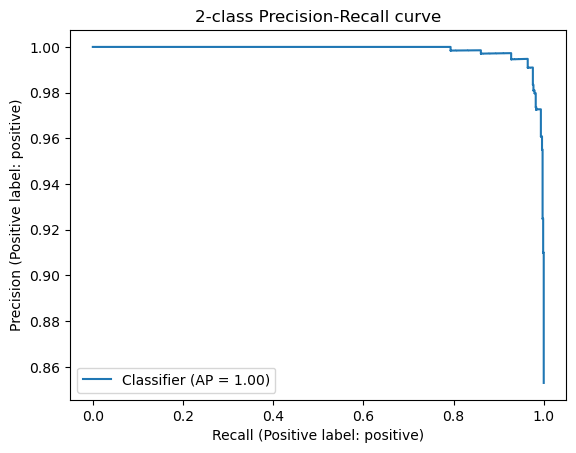

In [9]:
from sklearn.metrics import PrecisionRecallDisplay

def evaluate_embeddings_approach(
    labels = ['negative', 'positive'],
    model = EMBEDDING_MODEL,
):
    label_embeddings = [get_embedding(label, model=model) for label in labels]

    def label_score(review_embedding, label_embeddings):
        return cosine_similarity(review_embedding, label_embeddings[1]) - cosine_similarity(review_embedding, label_embeddings[0])

    probas = df["embedding"].apply(lambda x: label_score(x, label_embeddings))
    preds = probas.apply(lambda x: 'positive' if x>0 else 'negative')

    report = classification_report(df.sentiment, preds)
    print(report)

    display = PrecisionRecallDisplay.from_predictions(df.sentiment, probas, pos_label='positive')
    _ = display.ax_.set_title("2-class Precision-Recall curve")

evaluate_embeddings_approach(labels=['An Amazon review with a negative sentiment.', 'An Amazon review with a positive sentiment.'])